In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df_train = pd.read_csv('../input/dads6003-in-class-competition/train.csv')
df_train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [4]:
df_test = pd.read_csv('../input/dads6003-in-class-competition/test.csv')
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


# 1.) Cleansing data

## Checking Data quality, quantity and types in training and testing dataframe.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7391 non-null   float64
 1   x2      7466 non-null   float64
 2   x3      7444 non-null   float64
 3   x4      7407 non-null   float64
 4   x5      7440 non-null   float64
 5   x6      7382 non-null   float64
 6   x7      7419 non-null   float64
 7   x8      7365 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7421 non-null   float64
 10  x11     7483 non-null   float64
 11  x12     7488 non-null   float64
 12  x13     7370 non-null   float64
 13  x14     7376 non-null   float64
 14  x15     7393 non-null   float64
 15  x16     7407 non-null   float64
 16  x17     7375 non-null   float64
 17  x18     7480 non-null   float64
 18  x19     7355 non-null   float64
 19  x20     7374 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2500 non-null   float64
 1   x2      2500 non-null   float64
 2   x3      2500 non-null   float64
 3   x4      2500 non-null   float64
 4   x5      2500 non-null   float64
 5   x6      2500 non-null   float64
 6   x7      2500 non-null   float64
 7   x8      2500 non-null   float64
 8   x9      2500 non-null   float64
 9   x10     2500 non-null   float64
 10  x11     2500 non-null   float64
 11  x12     2500 non-null   float64
 12  x13     2500 non-null   float64
 13  x14     2500 non-null   float64
 14  x15     2500 non-null   float64
 15  x16     2500 non-null   float64
 16  x17     2500 non-null   float64
 17  x18     2500 non-null   float64
 18  x19     2500 non-null   float64
 19  x20     2500 non-null   float64
dtypes: float64(20)
memory usage: 390.8 KB


## Check the data distribution for each column in training dataframe.

Text(0.5, 0, 'x20')

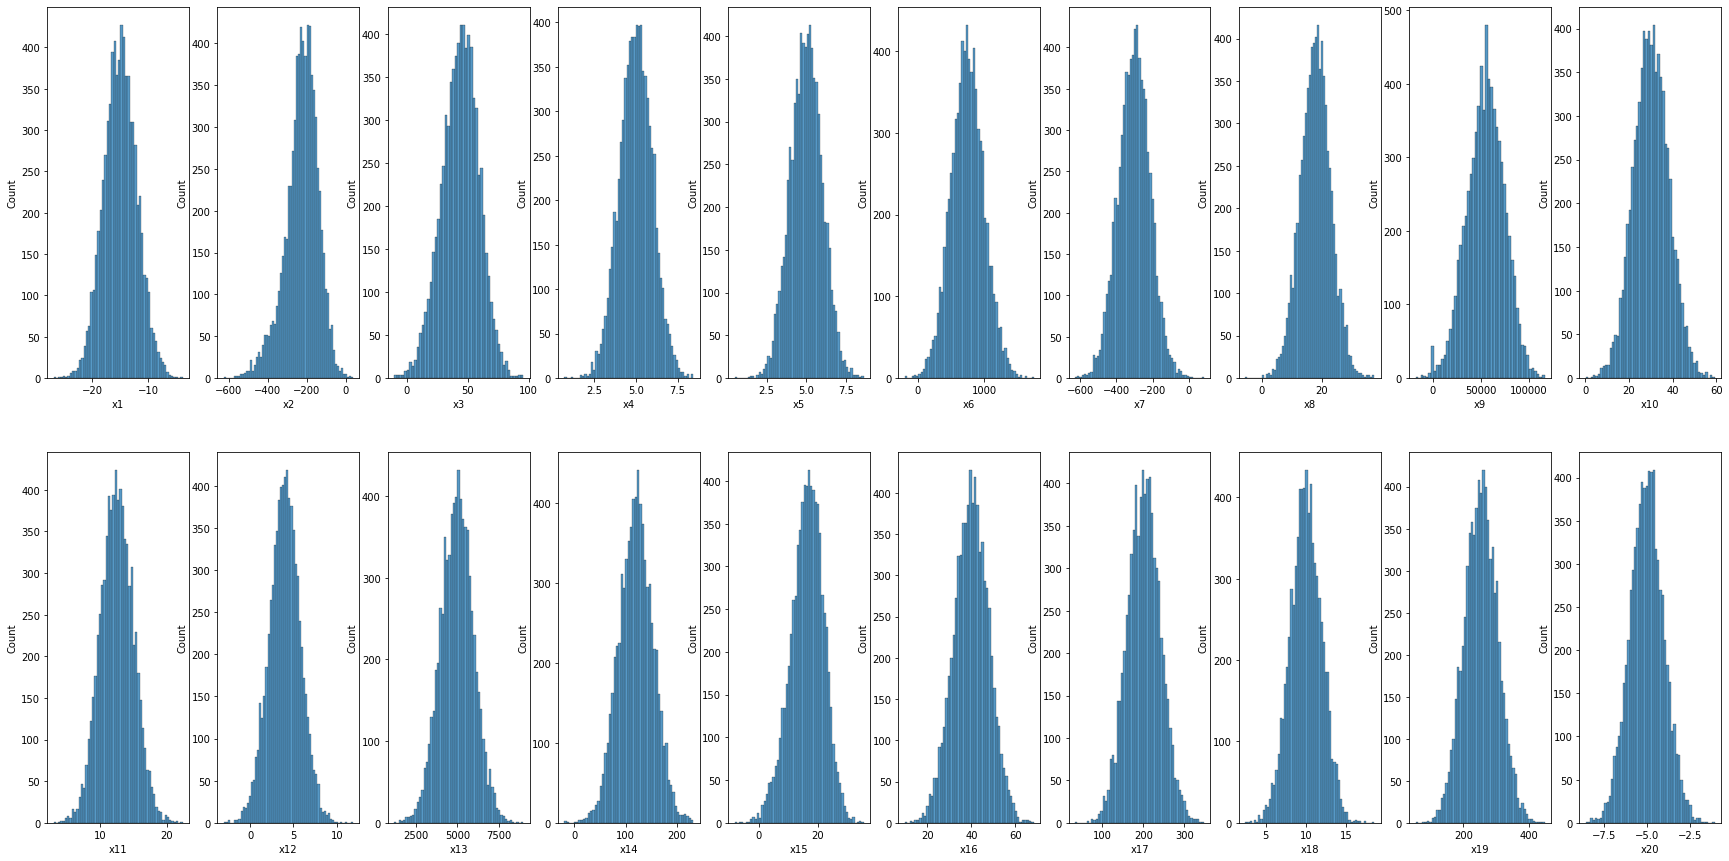

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, figsize=(30,15))

sns.histplot(data = df_train, x = df_train['x1'], ax=axes[0,0])
sns.histplot(data = df_train, x = df_train['x2'], ax=axes[0,1])
sns.histplot(data = df_train, x = df_train['x3'], ax=axes[0,2])
sns.histplot(data = df_train, x = df_train['x4'], ax=axes[0,3])
sns.histplot(data = df_train, x = df_train['x5'], ax=axes[0,4])
sns.histplot(data = df_train, x = df_train['x6'], ax=axes[0,5])
sns.histplot(data = df_train, x = df_train['x7'], ax=axes[0,6])
sns.histplot(data = df_train, x = df_train['x8'], ax=axes[0,7])
sns.histplot(data = df_train, x = df_train['x9'], ax=axes[0,8])
sns.histplot(data = df_train, x = df_train['x10'], ax=axes[0,9])
sns.histplot(data = df_train, x = df_train['x11'], ax=axes[1,0])
sns.histplot(data = df_train, x = df_train['x12'], ax=axes[1,1])
sns.histplot(data = df_train, x = df_train['x13'], ax=axes[1,2])
sns.histplot(data = df_train, x = df_train['x14'], ax=axes[1,3])
sns.histplot(data = df_train, x = df_train['x15'], ax=axes[1,4])
sns.histplot(data = df_train, x = df_train['x16'], ax=axes[1,5])
sns.histplot(data = df_train, x = df_train['x17'], ax=axes[1,6])
sns.histplot(data = df_train, x = df_train['x18'], ax=axes[1,7])
sns.histplot(data = df_train, x = df_train['x19'], ax=axes[1,8])
sns.histplot(data = df_train, x = df_train['x20'], ax=axes[1,9])

axes[0,0].set_xlabel("x1")
axes[0,1].set_xlabel("x2")
axes[0,2].set_xlabel("x3")
axes[0,3].set_xlabel("x4")
axes[0,4].set_xlabel("x5")
axes[0,5].set_xlabel("x6")
axes[0,6].set_xlabel("x7")
axes[0,7].set_xlabel("x8")
axes[0,8].set_xlabel("x9")
axes[0,9].set_xlabel("x10")
axes[1,0].set_xlabel("x11")
axes[1,1].set_xlabel("x12")
axes[1,2].set_xlabel("x13")
axes[1,3].set_xlabel("x14")
axes[1,4].set_xlabel("x15")
axes[1,5].set_xlabel("x16")
axes[1,6].set_xlabel("x17")
axes[1,7].set_xlabel("x18")
axes[1,8].set_xlabel("x19")
axes[1,9].set_xlabel("x20")

## Check the data distribution for each column in testing dataframe.

Text(0.5, 0, 'x20')

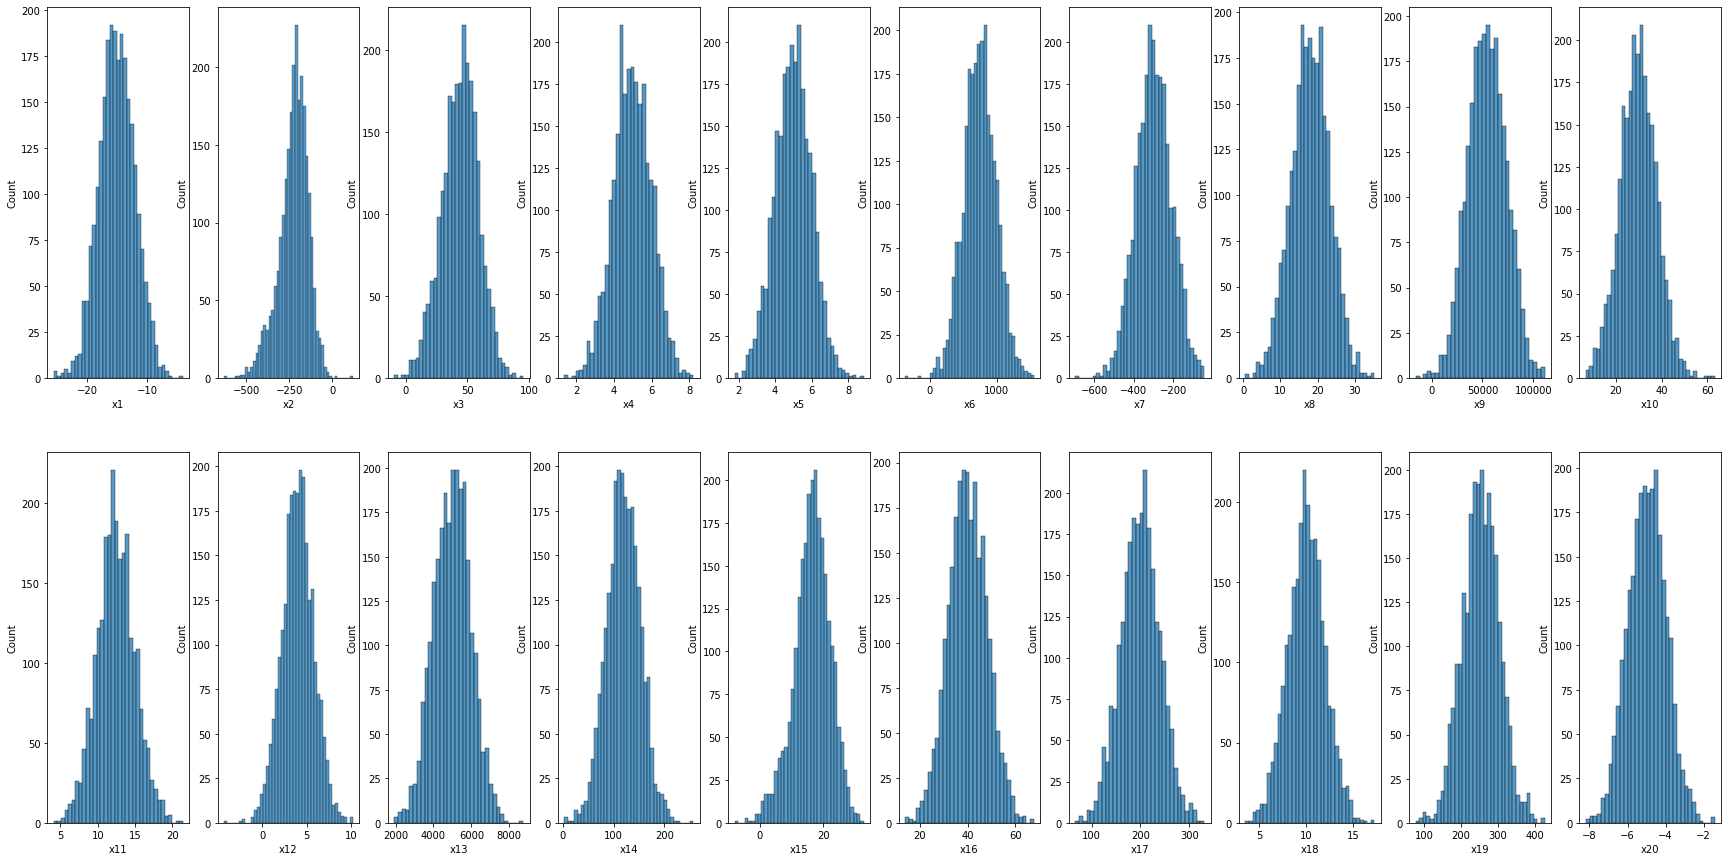

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 10, figsize=(30,15))

sns.histplot(data = df_test, x = df_test['x1'], ax=axes[0,0])
sns.histplot(data = df_test, x = df_test['x2'], ax=axes[0,1])
sns.histplot(data = df_test, x = df_test['x3'], ax=axes[0,2])
sns.histplot(data = df_test, x = df_test['x4'], ax=axes[0,3])
sns.histplot(data = df_test, x = df_test['x5'], ax=axes[0,4])
sns.histplot(data = df_test, x = df_test['x6'], ax=axes[0,5])
sns.histplot(data = df_test, x = df_test['x7'], ax=axes[0,6])
sns.histplot(data = df_test, x = df_test['x8'], ax=axes[0,7])
sns.histplot(data = df_test, x = df_test['x9'], ax=axes[0,8])
sns.histplot(data = df_test, x = df_test['x10'], ax=axes[0,9])
sns.histplot(data = df_test, x = df_test['x11'], ax=axes[1,0])
sns.histplot(data = df_test, x = df_test['x12'], ax=axes[1,1])
sns.histplot(data = df_test, x = df_test['x13'], ax=axes[1,2])
sns.histplot(data = df_test, x = df_test['x14'], ax=axes[1,3])
sns.histplot(data = df_test, x = df_test['x15'], ax=axes[1,4])
sns.histplot(data = df_test, x = df_test['x16'], ax=axes[1,5])
sns.histplot(data = df_test, x = df_test['x17'], ax=axes[1,6])
sns.histplot(data = df_test, x = df_test['x18'], ax=axes[1,7])
sns.histplot(data = df_test, x = df_test['x19'], ax=axes[1,8])
sns.histplot(data = df_test, x = df_test['x20'], ax=axes[1,9])

axes[0,0].set_xlabel("x1")
axes[0,1].set_xlabel("x2")
axes[0,2].set_xlabel("x3")
axes[0,3].set_xlabel("x4")
axes[0,4].set_xlabel("x5")
axes[0,5].set_xlabel("x6")
axes[0,6].set_xlabel("x7")
axes[0,7].set_xlabel("x8")
axes[0,8].set_xlabel("x9")
axes[0,9].set_xlabel("x10")
axes[1,0].set_xlabel("x11")
axes[1,1].set_xlabel("x12")
axes[1,2].set_xlabel("x13")
axes[1,3].set_xlabel("x14")
axes[1,4].set_xlabel("x15")
axes[1,5].set_xlabel("x16")
axes[1,6].set_xlabel("x17")
axes[1,7].set_xlabel("x18")
axes[1,8].set_xlabel("x19")
axes[1,9].set_xlabel("x20")

From the figure, we can see that the data in each column in training dataframe has a normal distribution, therefore we can fill in the missing value with the mean.

In [9]:
df_train_clean = df_train.fillna(df_train.mean())

In [10]:
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7500 non-null   float64
 1   x2      7500 non-null   float64
 2   x3      7500 non-null   float64
 3   x4      7500 non-null   float64
 4   x5      7500 non-null   float64
 5   x6      7500 non-null   float64
 6   x7      7500 non-null   float64
 7   x8      7500 non-null   float64
 8   x9      7500 non-null   float64
 9   x10     7500 non-null   float64
 10  x11     7500 non-null   float64
 11  x12     7500 non-null   float64
 12  x13     7500 non-null   float64
 13  x14     7500 non-null   float64
 14  x15     7500 non-null   float64
 15  x16     7500 non-null   float64
 16  x17     7500 non-null   float64
 17  x18     7500 non-null   float64
 18  x19     7500 non-null   float64
 19  x20     7500 non-null   float64
 20  y       7500 non-null   int64  
dtypes: float64(20), int64(1)
memory usage

# 2. Exploratory Data Analysis

## View the training dataframe's statistical summary.

In [11]:
df_train_clean.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,-14.968355,-225.221402,43.881855,5.011837,5.000313,747.260313,-301.412577,18.022226,54976.184397,30.205776,...,3.989506,4980.754126,119.932257,16.416643,39.940365,201.071874,9.989558,253.723195,-5.011305,0.252667
std,2.966606,84.094564,15.086516,0.970315,0.999328,247.284246,87.513970,5.014921,19537.797954,8.020401,...,1.782416,989.081532,33.104675,5.575613,7.925226,40.334959,1.948900,50.190312,0.975627,0.434570
min,-26.927722,-624.653252,-10.267461,0.735394,0.477509,-195.823833,-628.442832,-5.428193,-17829.881370,0.331504,...,-3.003061,1184.208527,-19.548508,-8.185806,9.690014,33.155239,2.461842,54.792614,-8.568794,0.000000
25%,-16.946875,-270.376488,33.870690,4.368899,4.321786,581.650314,-359.040620,14.716035,42118.143668,24.865334,...,2.807211,4312.682195,97.653228,12.987055,34.663956,174.242736,8.708315,220.098241,-5.659095,0.000000
50%,-14.968355,-217.144663,44.355424,5.011837,5.000313,747.260313,-301.012365,18.022226,55645.293455,30.205776,...,4.001668,4980.754126,119.932257,16.640083,39.940365,201.071874,9.989558,253.723195,-5.011305,0.000000
75%,-12.981909,-169.082614,54.154654,5.664521,5.674039,907.860296,-242.495011,21.291684,68519.592863,35.556479,...,5.158987,5633.053472,141.823945,20.245645,45.297458,227.817983,11.313516,287.382628,-4.375275,1.000000
max,-3.829402,37.543107,95.317156,8.439056,8.623321,1748.660648,84.687849,37.603060,116364.508600,59.280488,...,11.824146,8972.429051,231.576019,35.623238,68.438686,348.124801,18.477174,446.767201,-1.054174,1.000000


## Check correlation between features and target variable.

<AxesSubplot:>

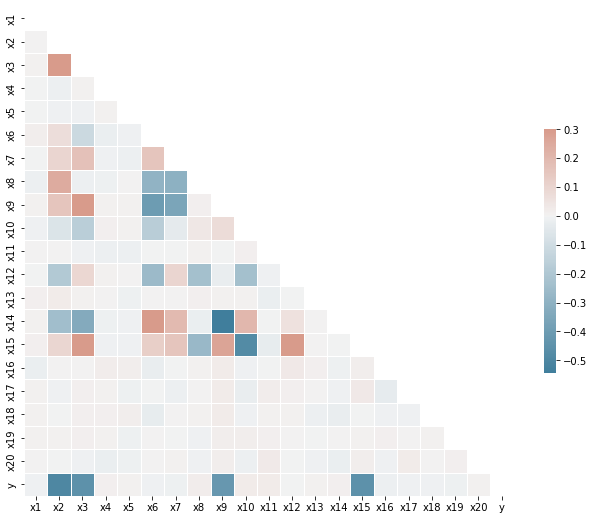

In [12]:
# Calculate Pearson's correlation coefficient
corr = df_train_clean.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the correlation plot, the features x1,x2,x9, and x15 have a substantial negative correlation with the target variable y.

# 3. Training data

## Data Preprocessing

When we found that the data in the training and testing dataframes is normally distributed, we should use standardization to scale the data into the same range.

In [13]:
for i in df_train_clean.columns:
    if i != "y":
        df_train_clean[i] = stats.zscore(df_train_clean[i])
        df_test[i] = stats.zscore(df_test[i])

In [14]:
df_train_clean

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.428442,0.698947,0.911654,0.865392,1.443804,0.106262,-1.418199,0.302981,2.424030,0.911454,...,-1.577516,-4.547291e-01,-1.649764,-0.997306,0.299999,3.633804e-01,-0.034184,-1.187005,0.441791,0
1,1.217126,0.590306,1.162167,-0.055976,1.023322,-0.625213,1.673207,-0.170796,0.073392,0.431685,...,1.289750,7.736441e-01,0.141903,0.556542,-0.310226,-1.854822e-01,0.149461,-1.884371,0.666016,0
2,-1.361861,-0.488537,-0.043340,0.166671,0.569785,0.669238,-0.406692,0.067952,-0.909673,-0.749549,...,0.702206,3.928463e-01,0.501613,0.073154,-1.032108,-1.302979e-01,-0.197764,-2.092828,-0.318981,1
3,-0.634266,-0.038499,0.103316,1.293782,-0.875517,0.351235,0.049317,-0.328336,-0.000458,-1.200483,...,-0.938894,1.103515e-14,-0.049435,0.637856,1.486816,2.324393e-01,-0.965207,1.132092,-0.198900,0
4,1.162890,-1.434674,-0.425015,1.202821,0.527850,-0.457015,0.666686,-0.246600,0.379870,1.198249,...,0.772541,1.194293e+00,-1.767772,-0.076372,1.478789,5.664325e-02,1.315375,-0.236216,0.125295,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-2.699467,1.634939,1.835791,0.124883,0.005473,-1.506817,0.796673,0.809660,0.869762,0.387426,...,1.266777,-1.680780e-01,-0.820104,0.652908,-1.076652,1.226771e+00,0.050621,-0.353727,0.328213,0
7496,0.066986,1.965062,1.836138,-0.356851,-0.206446,0.723452,1.628142,0.877666,-0.608664,1.122871,...,-1.207929,6.942473e-01,0.532243,-0.215966,0.217027,8.931860e-01,-0.618285,2.062590,-0.384754,0
7497,1.166993,0.656634,1.960915,-1.600626,-0.182818,-0.478684,-0.255569,0.302034,1.159925,-0.895256,...,-1.446459,-8.759578e-02,-1.850916,0.461645,0.594100,-1.125631e+00,-0.180532,0.269371,0.254563,0
7498,-1.391719,-0.253946,-1.543231,-1.272228,0.002425,0.887350,0.302233,-0.677466,-1.705744,0.532342,...,1.096651,5.924447e-02,2.052772,-0.033663,-0.804773,1.409378e-14,-0.509560,2.484089,-0.641835,0


In [15]:
df_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.046451,-2.225275,-1.823140,0.652070,1.257310,-0.194679,0.304902,-0.883773,0.319061,0.141315,-2.707939,0.656691,1.323474,1.643752,0.601550,-0.971904,0.162820,-0.847057,-0.441616,-0.154150
1,0.345140,-0.134658,0.635898,-0.228871,-0.323003,1.956466,1.250985,-2.137466,0.035397,-1.859363,1.307699,-0.055403,-1.263298,-2.643305,0.096016,-0.516826,-0.201950,0.492521,0.257075,-0.235526
2,1.088266,0.361084,-0.369866,0.631303,-0.842440,0.778585,1.274220,-0.163958,-1.228706,0.608029,0.125347,0.508198,1.774571,1.868732,0.692071,-0.781325,-0.831241,-1.479062,-2.772547,-1.124720
3,1.414196,0.220860,0.445752,0.958012,0.312812,0.177372,0.570464,-1.574997,-0.395758,-0.551780,0.641981,1.781918,0.676220,0.234164,0.766046,1.216681,-1.505077,-0.209728,-0.813483,-1.402523
4,-0.700310,0.963487,0.607439,0.963337,0.630733,-0.856031,-0.053556,0.735675,0.632425,0.611477,0.549131,0.428777,0.394717,-0.016333,0.578344,-0.022697,2.803748,1.295784,0.190670,0.644819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.427998,1.178651,1.503355,-0.468110,-0.566214,0.320919,2.111974,0.905945,-0.331981,1.161346,-0.437064,-1.219897,-0.353353,0.512961,-0.260191,-0.106806,-0.674651,0.439390,1.667235,2.669668
2496,-0.728266,0.406356,0.214107,-0.563238,-0.105644,-0.021284,0.299471,0.456079,0.255091,0.080229,0.627091,-0.618898,0.863118,0.236270,0.190051,0.062713,-0.476684,0.187064,0.916329,1.762726
2497,-0.318980,1.222518,0.866773,0.095841,-0.198878,-0.829911,-1.640833,1.368794,1.471970,-0.459498,1.842958,-0.360303,0.248412,-1.449426,-0.019868,-0.405783,0.449935,-0.302706,2.710063,-0.518949
2498,0.347868,-0.468808,0.044253,-0.224710,1.410563,0.875576,0.630571,-0.622270,-0.421859,-0.655395,-0.035952,-1.219312,0.162190,-1.763928,-1.241625,-1.711024,-0.856094,-1.814906,1.113627,0.874831


Data distribution plots after clean and standardize.

<AxesSubplot:xlabel='x20', ylabel='Count'>

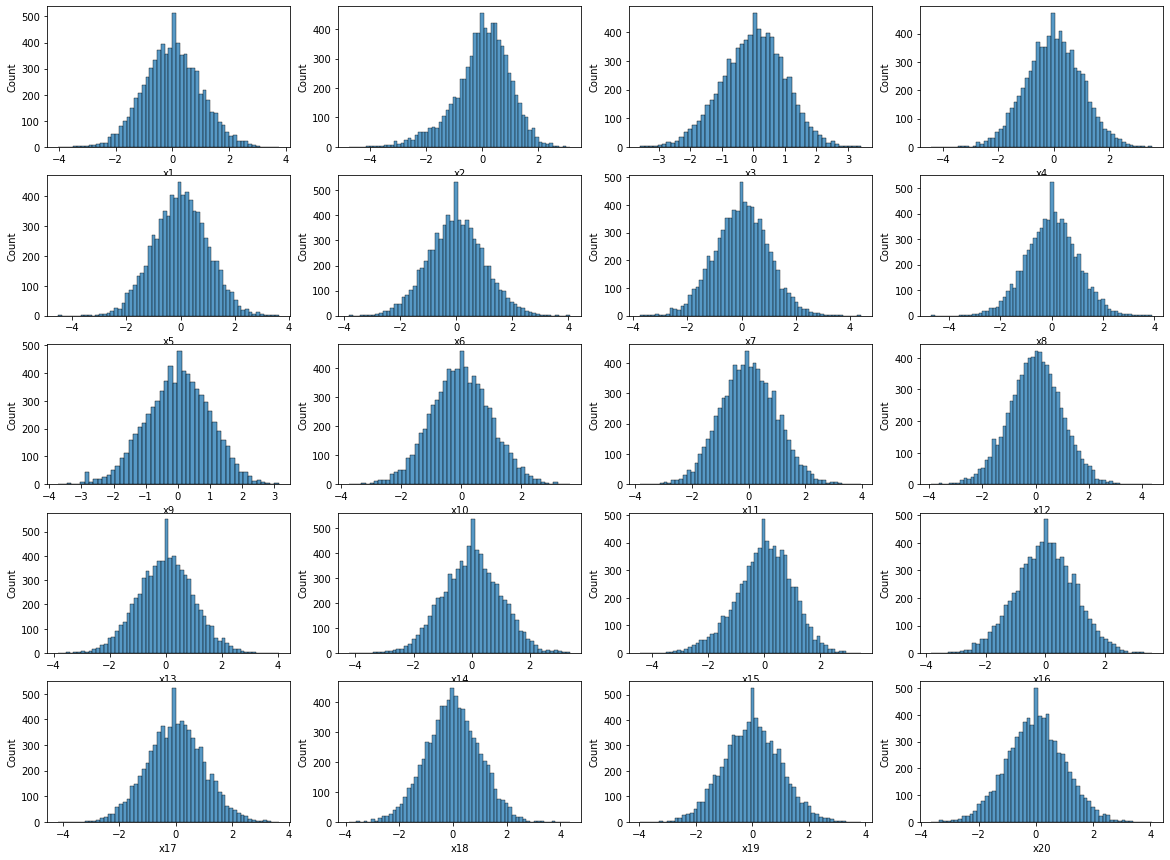

In [16]:
fig, axes = plt.subplots(5, 4, figsize=(20,15))
axes[0,0].set_xlabel("x1")
axes[0,1].set_xlabel("x2")
axes[0,2].set_xlabel("x3")
axes[0,3].set_xlabel("x4")
axes[1,0].set_xlabel("x5")
axes[1,1].set_xlabel("x6")
axes[1,2].set_xlabel("x7")
axes[1,3].set_xlabel("x8")
axes[2,0].set_xlabel("x9")
axes[2,1].set_xlabel("x10")
axes[2,2].set_xlabel("x11")
axes[2,3].set_xlabel("x12")
axes[3,0].set_xlabel("x13")
axes[3,1].set_xlabel("x14")
axes[3,2].set_xlabel("x15")
axes[3,3].set_xlabel("x16")
axes[4,0].set_xlabel("x17")
axes[4,1].set_xlabel("x18")
axes[4,2].set_xlabel("x19")
axes[4,3].set_xlabel("x20")

sns.histplot(data = df_train_clean, x = df_train_clean['x1'], ax=axes[0,0])
sns.histplot(data = df_train_clean, x = df_train_clean['x2'], ax=axes[0,1])
sns.histplot(data = df_train_clean, x = df_train_clean['x3'], ax=axes[0,2])
sns.histplot(data = df_train_clean, x = df_train_clean['x4'], ax=axes[0,3])
sns.histplot(data = df_train_clean, x = df_train_clean['x5'], ax=axes[1,0])
sns.histplot(data = df_train_clean, x = df_train_clean['x6'], ax=axes[1,1])
sns.histplot(data = df_train_clean, x = df_train_clean['x7'], ax=axes[1,2])
sns.histplot(data = df_train_clean, x = df_train_clean['x8'], ax=axes[1,3])
sns.histplot(data = df_train_clean, x = df_train_clean['x9'], ax=axes[2,0])
sns.histplot(data = df_train_clean, x = df_train_clean['x10'], ax=axes[2,1])
sns.histplot(data = df_train_clean, x = df_train_clean['x11'], ax=axes[2,2])
sns.histplot(data = df_train_clean, x = df_train_clean['x12'], ax=axes[2,3])
sns.histplot(data = df_train_clean, x = df_train_clean['x13'], ax=axes[3,0])
sns.histplot(data = df_train_clean, x = df_train_clean['x14'], ax=axes[3,1])
sns.histplot(data = df_train_clean, x = df_train_clean['x15'], ax=axes[3,2])
sns.histplot(data = df_train_clean, x = df_train_clean['x16'], ax=axes[3,3])
sns.histplot(data = df_train_clean, x = df_train_clean['x17'], ax=axes[4,0])
sns.histplot(data = df_train_clean, x = df_train_clean['x18'], ax=axes[4,1])
sns.histplot(data = df_train_clean, x = df_train_clean['x19'], ax=axes[4,2])
sns.histplot(data = df_train_clean, x = df_train_clean['x20'], ax=axes[4,3])

To build a classification model, create a np array from df_train.

In [17]:
X = df_train_clean.iloc[:,:-1].to_numpy()
y= df_train_clean.iloc[:,-1:].to_numpy().ravel()
test_data = df_test.to_numpy()

## K-fold Cross Validation

Use K-Fold cross validation to validate and split our training dataset.

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1500 1501 1502 ... 7497 7498 7499] TEST: [   0    1    2 ... 1497 1498 1499]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [1500 1501 1502 ... 2997 2998 2999]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [3000 3001 3002 ... 4497 4498 4499]
TRAIN: [   0    1    2 ... 7497 7498 7499] TEST: [4500 4501 4502 ... 5997 5998 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [6000 6001 6002 ... 7497 7498 7499]


## Fit Model

We chose Multi Layer Perceptron Classifier Algorithm after doing several experiments with various classification techniques.

In [19]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Train Model
clf = MLPClassifier(random_state=42, max_iter=2000, activation= 'logistic',alpha=0.05)
model = clf.fit(X_train, y_train)

Because our training dataset contains too many characteristics that are poorly correlated or uncorrelated with the target variable y, we reduce the weight of uncorrelated features to nearly zero with alpha set to 0.05 (default = 0.0001) to avoid overfitting.

## Model Evaluation

To evaluate our model for this classification problem, we use the confusion matrix and the F1 score (average ='weighted').

tp= 370  fp= 10
fn= 14  tn= 1106
accuracy =  0.984
precision =  0.9736842105263158
recall =  0.9635416666666666
f1 =  0.968586387434555
f1 weighted =  0.9839724264533714


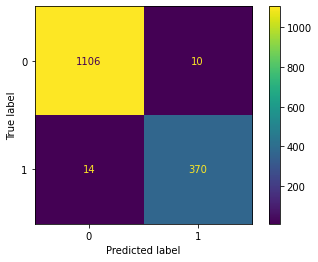

In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Predict
y_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tp=",tp," fp=",fp)
print("fn=",fn," tn=", tn)

accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
f1_w = metrics.f1_score(y_test, y_pred, average='weighted')

print("accuracy = ", accuracy)
print("precision = ",precision)
print("recall = ", recall)
print("f1 = ", f1)
print("f1 weighted = ", f1_w)

plot_confusion_matrix(model, X_test, y_test)
plt.show()

# 4. Testing data

In [21]:
# output
predict = model.predict(test_data)
fields = ['id','Expected']
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(predict)
df.to_csv('./submit.csv', index=False)